### 1.データの作成

前回と同様に
\\[ y = \frac{sin( \pi * x)}{\pi * x} + 0.1 * x + E ,  \ \ \ \ \  E \sim \mathcal{N}(\mu = 0, \sigma = 0.05) \\]
からデータを作成

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rand = np.random.RandomState(42)
n = 50
x = np.linspace(-3, 3, n)
pix = np.pi * x
y = np.sin(pix) / pix + 0.1*x + 0.05 * np.random.randn(n)

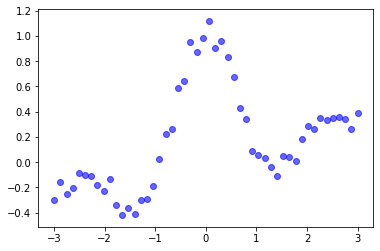

In [2]:
plt.scatter(x, y, c='b', alpha=0.6);

### 2. SGDでの学習

In [3]:
t0 = rand.randn(n)
hh = 2 * (0.3**2)
e = 0.1
interp = []

In [4]:
for i in range(n*1000):
    c = np.random.randint(0, 50)
    ki = np.exp(-(x-x[c])**2/hh)
    t = t0 - e * ki * (np.dot(ki,t0) - y[c])
    
    #学習経過を図示するために、途中のパラメータをいくつか保存
    if i in [0, 49, 99, 149, 199]:
        interp.append(t)
    
    if np.sqrt(np.sum((t-t0)**2)) <0.000001:
        print('break:{}'.format(i))
        break
        
    t0 = t

break:31396


In [5]:
N = 1000
X = np.linspace(-3, 3, N).reshape(-1,1)
K = np.exp( - (np.tile(X**2, (1,n)) + np.tile((x**2).T, (N,1)) - 2*X*(x.T)) / hh  )
F = np.dot(K, t0)

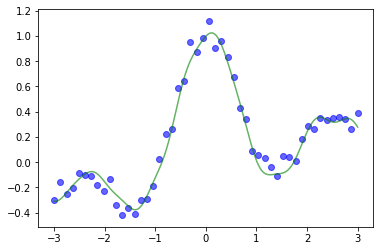

In [6]:
plt.scatter(x, y, c='b', alpha=0.6)
plt.plot(X, F, c='g', alpha=0.6);

### 学習経過の表示

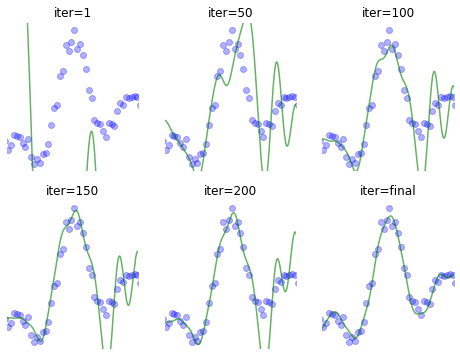

In [7]:
interp.append(t0)
num = [1,50,100,150,200,"final"]

_, ax = plt.subplots(2,3, figsize=(8,6))
for i in range(2):
    for j in range(3):
        ax[i][j].scatter(x, y, c='b', alpha=0.3)
        ax[i][j].plot(X, np.dot(K, interp[3*i+j]), c='g', alpha=0.6)
        ax[i][j].axis("off")
        ax[i][j].set_title("iter={}".format(num[3*i+j]))
        ax[i][j].set_xlim(-2.8, 2.8)
        ax[i][j].set_ylim(-0.5, 1.2)